<a href="https://colab.research.google.com/github/pr0fez/AI24-Programmering/blob/master/Exercises/E10-numpy.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# Numpy exercises

---
These are introductory exercises in Python with focus in **Numpy**.

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your answers in a neat way using <b>f-strings</b>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Dice simulations (*)

Simulations of one die,  

&nbsp; a) Calculate theoretical mean of a dice (six-sided) (*)

&nbsp; b) Now do simulations of

- 10
- 100
- 1000
- 10000
- 100000
- 1000000
- 10000000

number of dices and plot their means. (*)

<details>

<summary>Answer </summary>

a)
```
3.5
```

b) 

<img src="../assets/numpy_1b.png" width = 300>

</details>




In [ ]:
pop_mean= 1/6
pop_mean


0.16666666666666666

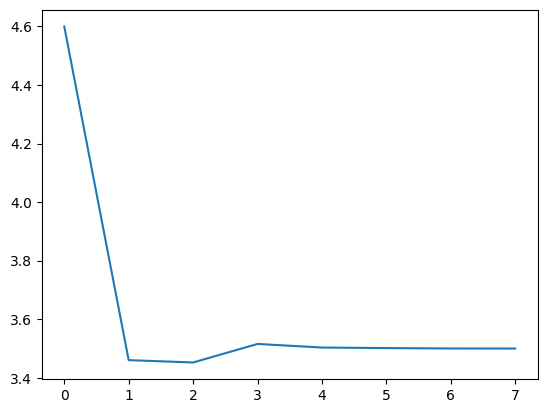

In [51]:
import numpy as np 
import matplotlib.pylab as plt 
n= 10 
def roll_ndice(n):
    rng= np.random.default_rng()
    return rng.integers(1,6,n,endpoint= True)
mean= list()
for n in [10**p for p in range(1,9)]:
    mean+= [np.mean(roll_ndice(n))]
x= list(range(len(mean)))
plt.plot(x,mean)



--- 
## 2. Several dices (**)

&nbsp; a) Make a sample space for the sum of two dices, i.e. all possible outcomes of these dices. (*)

&nbsp; b) Count the number of each values in the sample space (*)

&nbsp; c) Now calculate the frequency $f_i$ for each unique value. Also check that the sum of frequencies sums to 1, i.e. $\sum_i f_i = 1$. (*)

&nbsp; d) Make a bar chart of the sum of two dices, with frequencies in y and unique values in x. This is a probability distribution of the sum of your two dices. (*)

&nbsp; e) Now make barplots in subplots of sum of dices for 1 dice, 2 dices, 3 dices and 4 dices. What is the pattern that you see? (**)

<details>

<summary>Hint</summary>

a) 

Here are some potentially useful methods:

```py

np.meshgrid(), np.add.reduce(), np.unique()

```

c)

Divide by the total number of outcomes


</details>

<details>

<summary>Answer</summary>


a) 

Sample space

```
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
```

b) 

Unique values:
```
[ 2  3  4  5  6  7  8  9 10 11 12]
```

Count: 
```
[1 2 3 4 5 6 5 4 3 2 1]
```

c)

```
[0.028 0.056 0.083 0.111 0.139 0.167 0.139 0.111 0.083 0.056 0.028]
```

d) 


<img src="../assets/numpy2d.png" width = 300>


e) 

<img src="../assets/numpy2e.png" width = 500>


We see that when we sum several uniformly distributed random variables we will approach the normal distribution. This is called the central limit theorem, which we will come back to in the statistics course.

</details>

In [14]:
# alternativ 1
import numpy as np

# Alla möjliga värden för en tärning (1 till 6)
dice = np.arange(1, 7)
# Skapa alla möjliga kombinationer av två tärningar
d1, d2 = np.meshgrid(dice, dice)   # Två matriser med alla kombinationer
sample_space1 = d1 + d2             # Summan av de två tärningarna
# Skriv ut resultatet (alla möjliga summor)
print(sample_space1)

unique_values, counts = np.unique(sample_space1, return_counts=True)
print("Unika värden:", unique_values)
print("Antal förekomster för varje värde:", counts)
# Beräkna frekvensen (antal förekomster / totalt antal kombinationer)
frequencies = counts / counts.sum()
print("Frekvens:", frequencies)
print("Summan av frekvenser:", frequencies.sum())



[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]
Unika värden: [ 2  3  4  5  6  7  8  9 10 11 12]
Antal förekomster för varje värde: [1 2 3 4 5 6 5 4 3 2 1]
Frekvens: [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]
Summan av frekvenser: 1.0


In [27]:
#alternative 2
"""
import numpy as np

sample_space = np.array([sum((a, b)) for a in range(1, 7) for b in range(1, 7)])
print(sample_space)
counts=[len(sample_space[sample_space==n]) for n in range(2,13)]
counts
"""
# nu ska vi omvandla till en funkution
def sample_space_1d6():
    sample_space = np.array([a for a in range(1, 7)])
    return len(sample_space),[len(sample_space[sample_space==n]) for n in range(1,7)]
def sample_space_2d6():
    sample_space = np.array([sum((a, b)) for a in range(1, 7) for b in range(1, 7)])
    return len(sample_space),[len(sample_space[sample_space==n]) for n in range(2,13)]

def sample_space_3d6():
    sample_space = np.array([sum((a, b,c)) for a in range(1, 7) for b in range(1, 7) for c in range(1,7)])
    return len(sample_space),[len(sample_space[sample_space==n]) for n in range(3,19)]

def sample_space_4d6():
    sample_space = np.array([sum((a, b,c, d)) for a in range(1, 7) for b in range(1, 7)
                              for c in range(1,7)for d in range(1,7)])
    return len(sample_space),[len(sample_space[sample_space==n]) for n in range(4,25)]
sample_size_2d6 , counts2d6 =  sample_space_2d6()


In [29]:
freqs= [a/sample_size_2d6 for a in counts2d6]
freqs, sum(freqs)

([0.027777777777777776,
  0.05555555555555555,
  0.08333333333333333,
  0.1111111111111111,
  0.1388888888888889,
  0.16666666666666666,
  0.1388888888888889,
  0.1111111111111111,
  0.08333333333333333,
  0.05555555555555555,
  0.027777777777777776],
 1.0)

<BarContainer object of 11 artists>

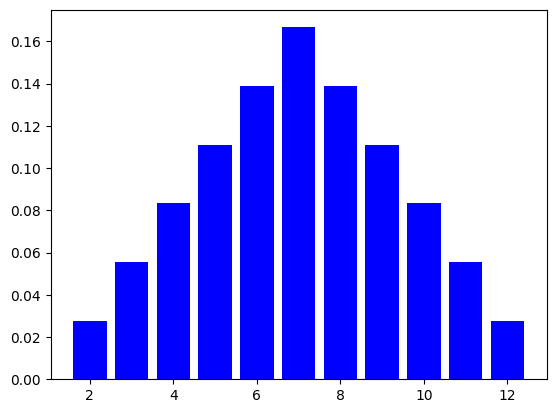

In [17]:
import matplotlib.pyplot as plt

plt.bar(range(2,13) , freqs , color= "blue")

<BarContainer object of 21 artists>

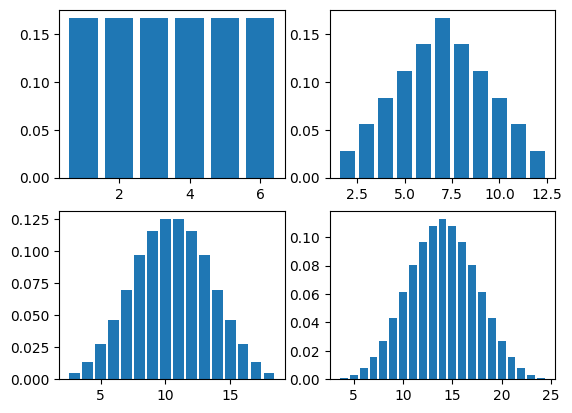

In [30]:
fig , ax = plt.subplots( 2,2)
size_1d6 , counts_1d6 = sample_space_1d6()
ax[0,0].bar( range(1,7 ),[a/size_1d6 for a in counts_1d6])
size_2d6 , counts_2d6 = sample_space_2d6()
ax[0,1].bar( range(2,13 ),[a/size_2d6 for a in counts_2d6])
size_3d6 , counts_3d6 = sample_space_3d6()
ax[1,0].bar( range(3,19 ),[a/size_3d6 for a in counts_3d6])
size_4d6 , counts_4d6 = sample_space_4d6()
ax[1,1].bar( range(4,25 ),[a/size_4d6 for a in counts_4d6])


--- 
## 3. Monte Carlo simulation (**)

This task has been done in earlier exercise, but now you should do this without any loops. Note that this has enormous performance gain compared to using loops. 

&nbsp; a) Simulate 500000 uniformly distributed points between -1 and 1, $X\sim U(-1,1)$. Now calculate the Euclidean distances between each point and the origin (0,0), $d_i = \sqrt{x_i^2 + y_i^2}$. For $d_i < 1$ plot the point with one color, and for $d_i > 1$ plot the point in another color, $i = \{1,\ldots, 500000\}$.  (**)

&nbsp; b) Calculate the fraction between number of inner points and number of outer points. What do you this will converge to when number of points reaches infinity? (**)


<details>

<summary>Hint</summary>

a) 

Read about numpy random and see if there are some useful methods to use. Also read about 

```
np.linalg.norm()
```

b)

Think in terms of theoretical areas.

</details>

<details>

<summary>Answer</summary>


a) 

<img src="../assets/MC_simulation_500k.png" width = 300>


b) 

0.784724

No answer here, try to prove it theoretically. 


</details>